# Problem 4 (*optional*)

**Attention**: *As of 7:00 on 9 October 9th 2023, the NOAA Climate Data Online website is down, so it is not possible to complete this problem. Sorry :(.*

This optional problem is an opportunity to practice calculating weather anomalies for another location. You get to start from scratch and download the data yourself from NOAA.

## What to do

1. Start by downloading your own data (daily summaries for years **1959-2018 August**) for **Sodankyla Lokka** (notice the place name should be without the letter `ä`), from the [NOAA Climate Data Online Search](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND). Make sure to select the starting day (and ending day) in the date selection panel after changing the year! After you have searched, click “Add to cart” for a selected station, then go to the cart. Select the ``Custom GHCN-Daily Text`` format for the resulting output file and hit continue.

    - From the `Station Detail & Data Flag Options` choose two of the following attributes: Station Name, Geographic Location. **Notice:** Do **NOT** include data flags because it makes the data difficult to read. Use **Standard** units.
    - Take also Precipitation and Temperature which are under a separate button below. 
    - From the next page, add your own email address where the weather data will be sent after a short moment.

2. After you have downloaded the data. you should first,

    - Calculate the average temperature using columns `TMAX` and `TMIN` and insert those values into a new column called `TAVG`.

3. Next, you should use the approaches learned during this week and used in Problem 3 to answer / do the following:

    - Calculate the temperature anomalies in Sodankylä, i.e., the difference between `reference_temps` and the average temperature for each month (see Problem 3).
    - Calculate the monthly temperature differences between the Sodankylä and Helsinki stations
        - How different are the summer temperatures (June, July, August) between Helsinki (used in Problems 1-3) and Sodankylä?
        - What were the summer mean temperatures for both of these stations?
        - What were the summer standard deviations for both of these stations?
    - Calculate the monthly differences in a DataFrame and save it (as `CSV` file) into your own Exercise repository for this week
4. Upload your notebook and data to GitHub

In [1]:
import pandas as pd
path = "data/3562049.txt"
data = pd.read_csv(path, skiprows=[1], delim_whitespace=True, na_values=-9999)

In [2]:
# Cleaning up the dataframe
data = data.reset_index()
data = data.drop(columns=["level_0", "level_1", "STATION", "STATION_NAME", "ELEVATION", "LATITUDE", "LONGITUDE"])

# Creating average temp
data["TAVG"] = (data["TMAX"] + data["TMIN"]) 

In [3]:
# Same approach as in exercise 3
data["month"] = pd.to_datetime(data["DATE"], format="%Y%m%d").dt.to_period('M')
monthly_data = data.groupby("month")[["PRCP", "TAVG"]].mean()
monthly_data = monthly_data.reset_index()
monthly_data["temp_celsius"] = (monthly_data["TAVG"] - 32) * 5/9

monthly_data = monthly_data.drop(columns=["TAVG"])
monthly_data = monthly_data.rename(columns={"month": "year_month"})

monthly_data["month"] = monthly_data.year_month.dt.month
new_filter = (monthly_data.year_month >= "1952-01") & (monthly_data.year_month < "1981-01")
new_filtered = monthly_data[new_filter]
reference_temps = new_filtered.groupby("month")[["temp_celsius"]].mean()
reference_temps = reference_temps.reset_index()
reference_temps = reference_temps.rename(columns={"temp_celsius": "ref_temp"})

# Joining both dataframes to get the ref temps for the 1952 to 1980 interval
monthly_data = monthly_data.merge(reference_temps, on ='month')

# Creating the temp differences column
monthly_data["diff"] = monthly_data["temp_celsius"] - monthly_data["ref_temp"] # diff is actually a bad name for a column...

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Normalizing precip data and temp data for quick check (yearly rolling average)
monthly_data[['diff_norm', 'PRCP_norm']] = scaler.fit_transform(monthly_data[['diff', 'PRCP']])
monthly_data[['diff_norm', 'PRCP_norm']] = monthly_data[['diff_norm', 'PRCP_norm']].rolling(12).mean()

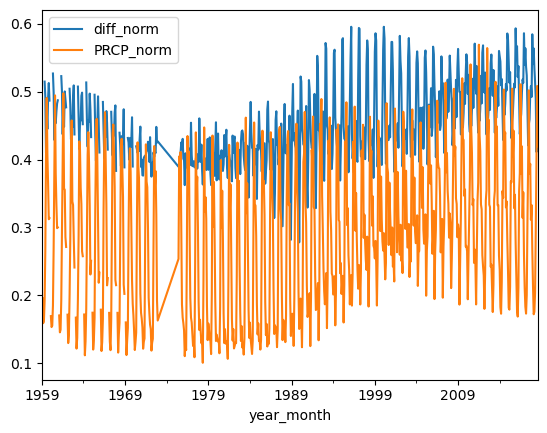

In [5]:
# Just a quick check...
monthly_data.sort_values(by="year_month").plot(x="year_month", y=["diff_norm", "PRCP_norm"]);